<a href="https://colab.research.google.com/github/KuSHagragARG-DEBUG/Vascular-heart-disease-prediction-/blob/main/module6_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML case study -Cardiovascular Disease Prediction Using Classification**

**Problem Statement**

Devise a ML model to predict Heart Attack 10 years in advance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Know Your Data**

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Impoting data preprocessing libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importing model selection libraries.
from sklearn.model_selection import train_test_split, GridSearchCV
# Importing metrics for model evaluation.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# Importing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Load Dataset
risk_df=pd.read_csv('/content/drive/MyDrive/dataset/data_cardiovascular_risk.csv')

In [ ]:
# Dataset Info
risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# Dataset First Look
risk_df.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


# Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
risk_df.duplicated().sum()

0

Patient ID doesn't contribute their health status, and it would'nt be of much help to the model either. Hence, we can drop the "id" column

In [ ]:
risk_df.drop(['id'],axis=1,inplace=True)

# **Handling Nans**

In [ ]:
# Missing Values/Null Values Count
round(risk_df.isna().sum()/risk_df.shape[0]*100,2)

age                0.00
education          2.57
sex                0.00
is_smoking         0.00
cigsPerDay         0.65
BPMeds             1.30
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.12
sysBP              0.00
diaBP              0.00
BMI                0.41
heartRate          0.03
glucose            8.97
TenYearCHD         0.00
dtype: float64

**Handling Missing Values**

Entries in this dataset are person-specific & related to the medical field.Consequently, dropping rows of those features which have less than 5% null values

In [ ]:
original_num_rows=risk_df.shape[0]
original_num_rows

3390

In [ ]:
# features which has less than 5%  null values present.
nan_columns = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

# dropping null values
risk_df.dropna(subset=nan_columns, inplace=True)
print(f'% Data lost {(original_num_rows-risk_df.shape[0])/original_num_rows*100}')

% Data lost 5.929203539823009


In [ ]:
# Glucose level are continuous in nature.
# Imputimg NaN values with median value.
# Glucose col can't be dropped as it has 9% null values & 6% data is already lost

risk_df['glucose']=risk_df['glucose'].fillna(risk_df.glucose.mean())

In [ ]:
# Dataset Describe
risk_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3189.0,49.423957,8.556235,32.00,42.00,49.00,56.00,70.0
education,3189.0,1.972719,1.018435,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3189.0,9.098150,11.864621,0.00,0.00,0.00,20.00,70.0
BPMeds,3189.0,0.029476,0.169164,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3189.0,0.005958,0.076970,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3189.0,0.313264,0.463894,0.00,0.00,0.00,1.00,1.0
diabetes,3189.0,0.025400,0.157361,0.00,0.00,0.00,0.00,1.0
totChol,3189.0,236.968642,44.537998,113.00,206.00,234.00,264.00,600.0
sysBP,3189.0,132.436344,22.176848,83.50,117.00,128.00,143.50,295.0
diaBP,3189.0,82.841173,11.993650,48.00,74.50,82.00,89.50,142.5


Check Unique Values for each variable.

In [ ]:
risk_df.nunique()

age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             235
sysBP               224
diaBP               141
BMI                1234
heartRate            68
glucose             128
TenYearCHD            2
dtype: int64

In [ ]:
numerical_features=[]
categorical_features = []
# splitting features into numeric and categorical.
'''
If feature has more than 10 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in risk_df.columns:
  if risk_df[col].nunique()>10:
    numerical_features.append(col)
  else:
    categorical_features.append(col)
print(numerical_features)
print(categorical_features)


['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


In [ ]:
for col in categorical_features:
  print(col)
  print(risk_df[col].unique())

education
[4. 1. 3. 2.]
sex
['M' 'F']
is_smoking
['NO' 'YES']
BPMeds
[0. 1.]
prevalentStroke
[0 1]
prevalentHyp
[1 0]
diabetes
[0 1]
TenYearCHD
[0 1]


# **Outlier Treatment & Data Distribution**

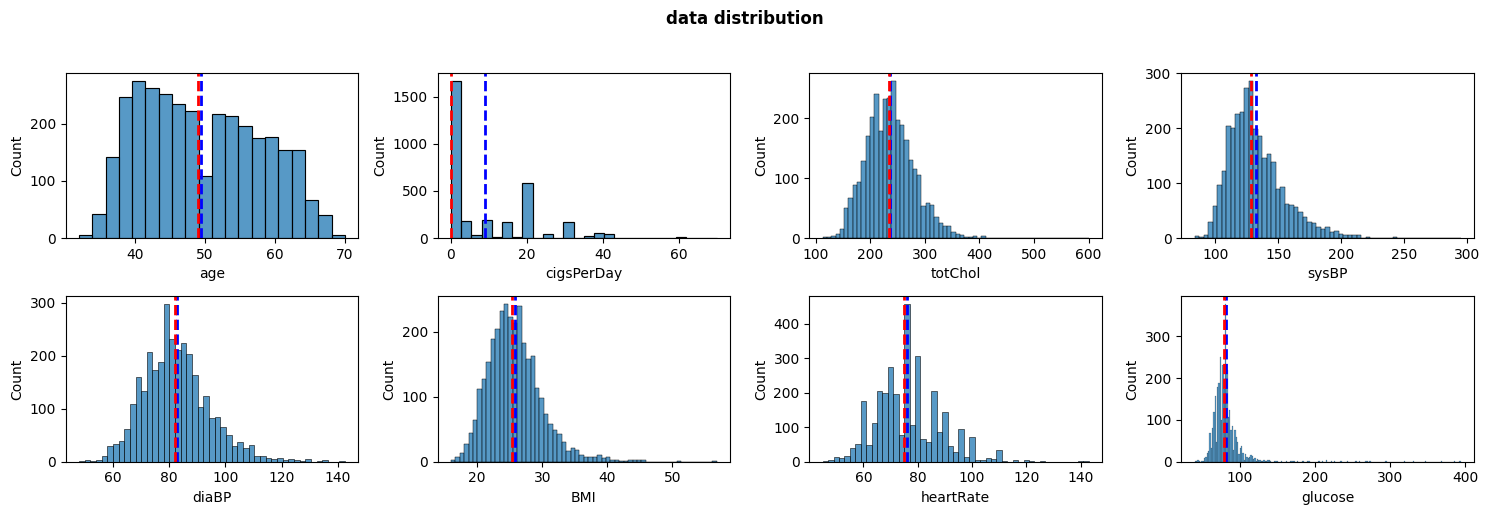

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle('data distribution',fontsize=12,fontweight='bold',y=1.02)
for i,col in enumerate(numerical_features):
 plt.subplot(2, 4, i+1)             # subplots of 2 rows and 4 columns
 sns.histplot(risk_df[col])
   # mean line
 plt.axvline(risk_df[col].mean(), color='blue', linestyle='dashed', linewidth=2)
   # median line
 plt.axvline(risk_df[col].median(), color='red', linestyle='dashed', linewidth=2)
  # x-axis label
 plt.xlabel(col)
 plt.tight_layout()


**Observation:**

Except age & diaBP all other distributions are right-skewed. It demonstrates that glucose has many outliers.

Some of the variables may get normal distribution when outliers are removed. As a result, it appears that outliers should be removed before the transformation.

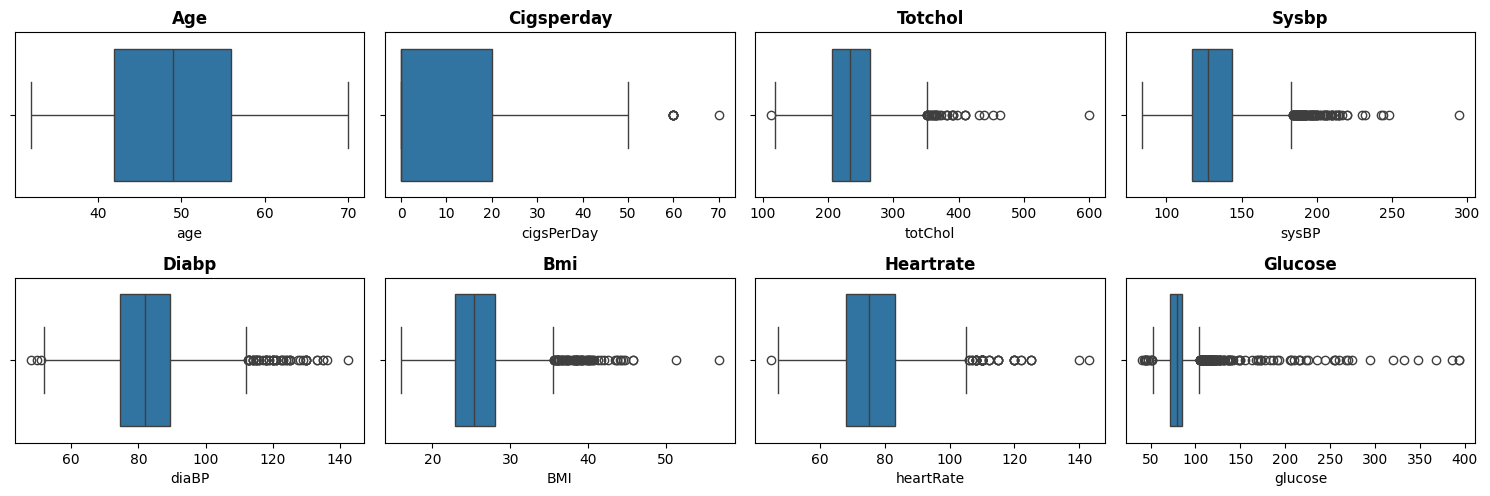

In [ ]:
plt.figure(figsize=(15,12))
for i,col in enumerate(numerical_features):
  plt.subplot(5,4,i+1)
  sns.boxplot(risk_df,x=col)
  plt.title(f'{col.title()}',weight='bold')
  plt.tight_layout()

In [ ]:
# Dropping rows with ['cigsPerDay']>=50 (50 is q3+1.5IQR)
risk_df=risk_df[risk_df['cigsPerDay']<=50]


In [ ]:
# Dropping rows with total cholesterol greater than 500.
risk_df = risk_df[risk_df["totChol"] <= 500]

In [ ]:
# Dropping rows with SysBP greater than 250.
risk_df = risk_df[risk_df['sysBP'] <= 250]

In [ ]:
# Dropping rows with DiaBp greater than 140.
risk_df = risk_df[risk_df['diaBP'] <= 140]

In [ ]:
# Dropping rows with BMI greater than 50.
risk_df = risk_df[risk_df['BMI'] <= 50]

In [ ]:
# Dropping rows with heart rate greater than 130.
risk_df = risk_df[risk_df["heartRate"] <= 130]

# **Correlation between variables**

<ipython-input-24-cf5001fa95e2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(risk_df.corr(),annot=True,cmap='RdYlGn')


<Axes: >

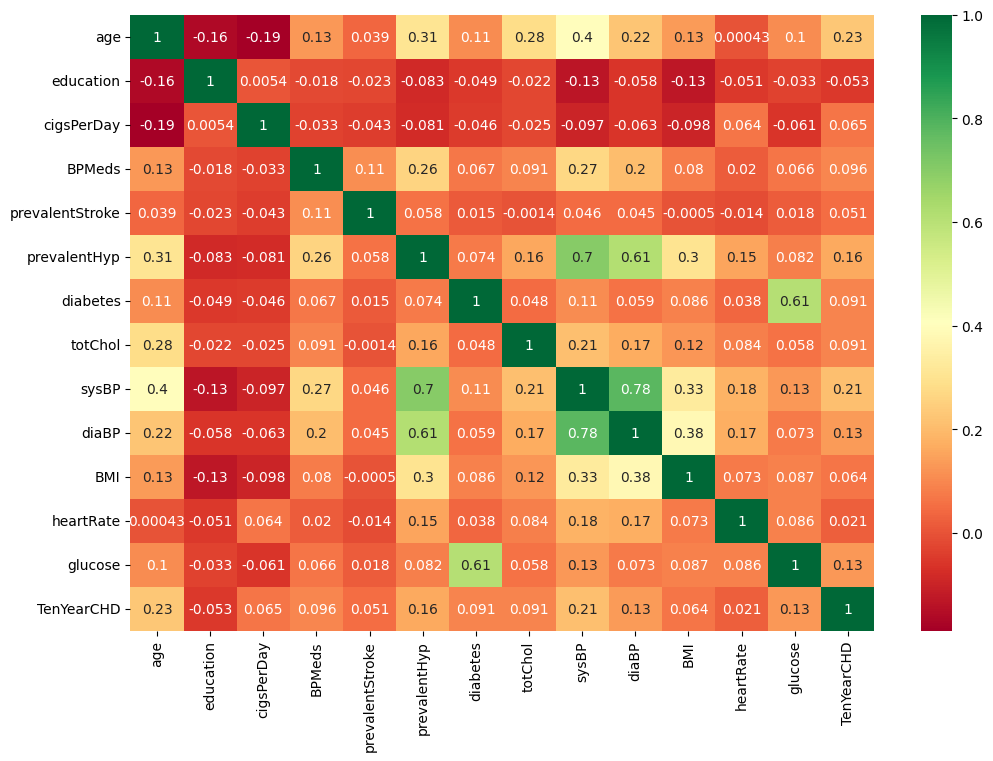

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(risk_df.corr(),annot=True,cmap='RdYlGn')

orr of TenYearCHD (Target Variable) & other col

Greater than = to 0.09

Age,prevHyp,dia,totChol,sysBp,diaBP,glucose
Seein skin/orangish color stronger the corr

High Corr bw BPmeds,sysBP,diaBP,heartRate,prevHyp

High Corr bw glucose & diabetes

# **3. Categorical Encoding**

If a person smokes (is_smoking=='YES'), but cigsPerDay is 0. Then it may develop into a conflicting case, we must treat those records.

In [ ]:
# dropping is_smoking column as it may lead to multi-collinearity
risk_df.drop('is_smoking', axis=1, inplace=True)

In [ ]:
# One Hot Encoding
risk_df=pd.get_dummies(risk_df,columns=['sex'],drop_first=True)

In [ ]:
risk_df

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_M
1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,1
2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,0
3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1
4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,0
5,61,3.0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,1.0,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0,0
3385,60,1.0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0,0
3386,46,1.0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0,0
3387,44,3.0,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1,1


# feature selection and feature manuplation

DiaBp And SysBP

From the above Heatmap, We can see DiaBp and SysBP  columns are heavily correleted((Corr bw diaBP & sysBP is 0.78)), there's some relationship we can establish with these two features further.

Also Elevation of systolic BP predicts the risk of cardiovascular disease better than increases in diastolic BP (Corr bw TenYearCHD & sysBP is 0.21).

We can combine these two features using the following formula:

"pulse_pressure"="sysBP"- diaBP


In [ ]:
risk_df['pulse_pressure']=risk_df['sysBP']-risk_df['diaBP']


In [ ]:
# Dropping the SysBP and DiaBp attributes, since they're both included in MAP.
risk_df.drop(columns = ["sysBP", "diaBP"], inplace = True)

# Data splitting

In [ ]:
X=risk_df.drop('TenYearCHD',axis=1)
y=risk_df['TenYearCHD']

In [ ]:
# Splitting the data into train and test sets.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2,stratify=y)
# stratify=y ensures split will maintain the proportion of each class
#  in both the training and testing sets as it is in the original dataset.

# Handling imbalanced dataset

In [ ]:
# Dependent Column Value Counts
print(risk_df.TenYearCHD.value_counts())
print('')

0    2704
1     470
Name: TenYearCHD, dtype: int64



When there are significantly more instances of certain classes than others, the issue of class imbalance typically arises. Class imbalance in the target class is a problem for machine learning models because it can result in biased predictions. That is why we need to balance the target class.

In [ ]:
from collections import Counter
## Handling target class imbalance using random oversampler
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(random_state=2)
print('Original dataset shape {}'.format(Counter(y_train)))

Original dataset shape Counter({0: 1892, 1: 329})


In [ ]:
# Resampling the minority class
X_train, y_train =os.fit_resample(X_train, y_train)

In [ ]:

print('Resampled dataset shape {}'.format(Counter(y_train)))

Resampled dataset shape Counter({1: 1892, 0: 1892})


In [ ]:
# Scaling Data
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **ML model implementation**


**Aim of the model**

Minimize False Positives:Actually having risk but predicted 0
Minimize False Neg :Actually not having but predicted 1
Maximize TP :Actuallly having it & predicted 1
Therefore, we use recall & f2 score as evaluation metric

In [ ]:
from sklearn.metrics import fbeta_score
# Function for model implementation

# empty list for appending performance metric score
model_result=[]
'''
  Below function will  predict value as per the model passed.
  Then it will calculate all the evaluation metrics and appending those metrics score on model_result DF.
  Plotting confusion_matrix and roc_curve for test data.
    '''
def predict(ml_model,model_name):
    # model fitting
  model=ml_model.fit(X_train,y_train)
    # predicting value and probability
  y_train_pred=model.predict(X_train)
  y_test_pred=model.predict(X_test)
  y_train_prob=model.predict_proba(X_train)[:,1]
  y_test_prob=model.predict_proba(X_test)[:,1]

  #   Performance Metrics
  # accuracy score  = (TP+TN)/(TP+FP+TN+FN)
  train_accuracy= accuracy_score(y_train,y_train_pred)
  test_accuracy=accuracy_score(y_test,y_test_pred)
  print(f'train accuracy :{round(train_accuracy,3)}')
  print(f'test accuracy :{round(test_accuracy,3)}')
   # precision score  =  TP/(TP+FP)
  train_precision = precision_score(y_train, y_train_pred)
  test_precision = precision_score(y_test, y_test_pred)
  print(f'train precision : {round(train_precision,3)}')
  print(f'test precision : {round(test_precision,3)}')

  # recall score  =  TP/(TP+FN)
  train_recall = recall_score(y_train, y_train_pred)
  test_recall = recall_score(y_test, y_test_pred)
  print(f'train recall : {round(train_recall,3)}')
  print(f'test recall : {round(test_recall,3)}')

  # f2 score  =  Giving more weightage to Recall
  train_f2 = fbeta_score(y_train, y_train_pred,beta=2)
  test_f2 = fbeta_score(y_test, y_test_pred,beta=2)
  print(f'train f2 : {round(train_f2,3)}')
  print(f'test f2 : {round(test_f2,3)}')
  # roc_auc score  =  It shows how well the model can differentiate between classes.
  train_roc_auc = roc_auc_score(y_train, y_train_prob)
  test_roc_auc = roc_auc_score(y_test, y_test_prob)
  print(f'train roc_auc : {round(train_roc_auc,3)}')
  print(f'test roc_auc : {round(test_roc_auc,3)}')
  print('-'*80)
  # classification report
  print(f'classification report for {model_name} \n{classification_report(y_test, y_test_pred)}')
  print('-'*80)
#    Plotting Confusion Matrix
  ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
  plt.title(f'Confusion matrix for {model_name} ')
  plt.show()
  print('-'*80)
  fpr,tpr,threshhold=roc_curve(y_test,y_test_prob)
  plt.plot(fpr,tpr, label=f'ROC - {model_name}')
  plt.plot([0,1], [0,1], '--')
  plt.title(f'ROC curve for {model_name}')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc=4)
  # Create the model_result DF from performance metrics .
  model_result.append({'model':model_name,
                       'train_accuracy':train_accuracy,
                       'test_accuracy':test_accuracy,
                       'train_precision':train_precision,
                       'test_precision':test_precision,
                       'train_recall':train_recall,
                       'test_recall':test_recall,
                       'train_f2':train_f2,
                       'test_f2':test_f2,
                       'train_roc_auc':train_roc_auc,
                       'test_roc_auc':test_roc_auc})

In [ ]:
risk_df.head(20)

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,sex_M,pulse_pressure
1,36,4.0,0.0,0.0,0,1,0,212.0,29.77,72.0,75.000000,0,1,70.0
2,46,1.0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.000000,0,0,45.0
3,50,1.0,20.0,0.0,0,1,0,233.0,28.26,68.0,94.000000,1,1,70.0
4,64,1.0,30.0,0.0,0,0,0,241.0,26.42,70.0,77.000000,0,0,51.5
5,61,3.0,0.0,0.0,0,1,0,272.0,32.80,85.0,65.000000,1,0,61.0
6,61,1.0,0.0,0.0,0,1,0,238.0,24.83,75.0,79.000000,0,1,96.0
7,36,4.0,35.0,0.0,0,0,0,295.0,28.15,60.0,63.000000,0,1,34.0
9,55,2.0,0.0,0.0,0,1,0,326.0,25.71,85.0,81.934404,0,0,63.0
11,53,2.0,0.0,0.0,0,0,0,210.0,22.49,88.0,87.000000,0,0,51.5
12,43,2.0,0.0,0.0,0,0,0,213.0,19.38,74.0,80.000000,0,0,34.0


train accuracy :0.68
test accuracy :0.669
train precision : 0.676
test precision : 0.251
train recall : 0.691
test recall : 0.624
train f2 : 0.688
test f2 : 0.481
train roc_auc : 0.739
test roc_auc : 0.719
--------------------------------------------------------------------------------
classification report for LogisticRegression 
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       812
           1       0.25      0.62      0.36       141

    accuracy                           0.67       953
   macro avg       0.58      0.65      0.57       953
weighted avg       0.81      0.67      0.72       953

--------------------------------------------------------------------------------


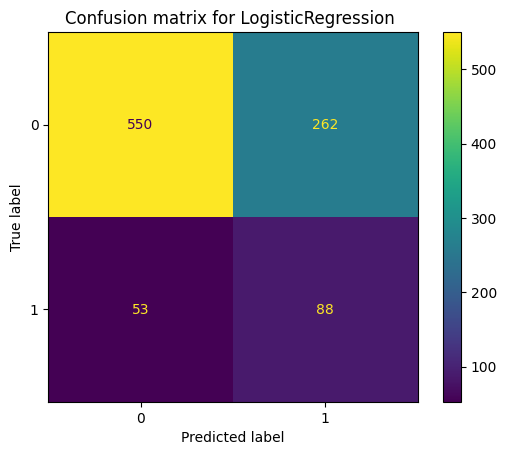

--------------------------------------------------------------------------------


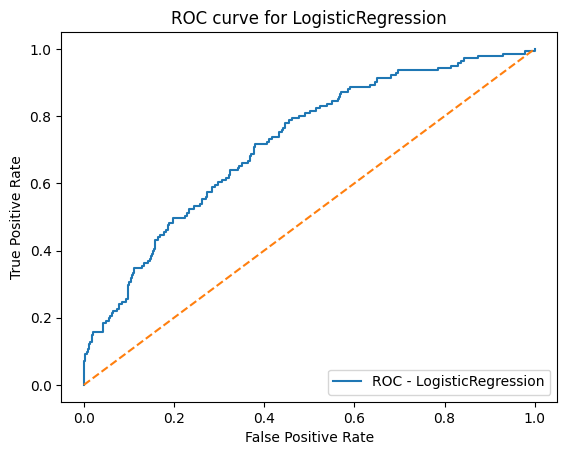

In [ ]:
# ML Model - 1 Implementation
predict(LogisticRegression(), 'LogisticRegression')
# Fit the Algorithm

# Predict on the model

train accuracy :0.768
test accuracy :0.724
train precision : 0.773
test precision : 0.269
train recall : 0.76
test recall : 0.504
train f2 : 0.763
test f2 : 0.429
train roc_auc : 0.84
test roc_auc : 0.67
--------------------------------------------------------------------------------
classification report for SVM 
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       812
           1       0.27      0.50      0.35       141

    accuracy                           0.72       953
   macro avg       0.58      0.63      0.59       953
weighted avg       0.81      0.72      0.75       953

--------------------------------------------------------------------------------


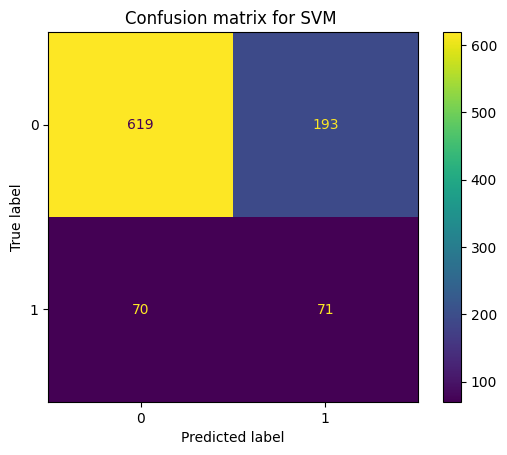

--------------------------------------------------------------------------------


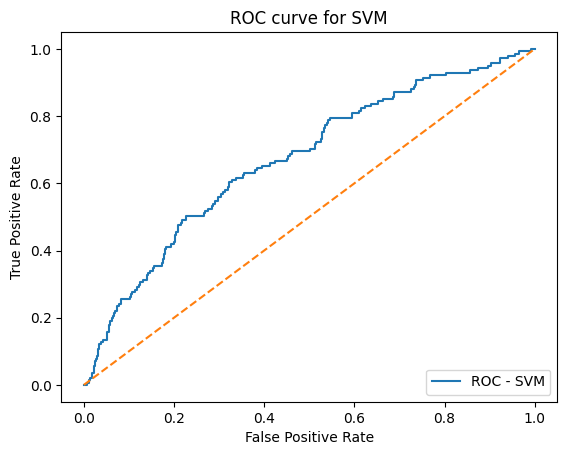

In [ ]:
predict(SVC(probability=True), 'SVM')

In [ ]:
dt_params = {'max_depth':[5,10,15,20],
          'min_samples_split': [50,75,100,125],            # maximum number of levels allowed in each tree.,
          'min_samples_leaf': [30,40,50]}  # minimum number of samples which can be stored in a tree leaf.


# performing Hyperparameter Tunning using GridSearchCV
dt=DecisionTreeClassifier()
dt_gridsearch = GridSearchCV(estimator=dt, param_grid=dt_params, cv=5)

# model fitting
dt_gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [30, 40, 50],
                         'min_samples_split': [50, 75, 100, 125]})

In [ ]:
dt_optimal_model = dt_gridsearch.best_estimator_
dt_optimal_model

DecisionTreeClassifier(max_depth=20, min_samples_leaf=30, min_samples_split=50)

train accuracy :0.787
test accuracy :0.675
train precision : 0.761
test precision : 0.225
train recall : 0.837
test recall : 0.489
train f2 : 0.821
test f2 : 0.396
train roc_auc : 0.874
test roc_auc : 0.606
--------------------------------------------------------------------------------
classification report for DT 
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       812
           1       0.22      0.49      0.31       141

    accuracy                           0.67       953
   macro avg       0.56      0.60      0.55       953
weighted avg       0.79      0.67      0.72       953

--------------------------------------------------------------------------------


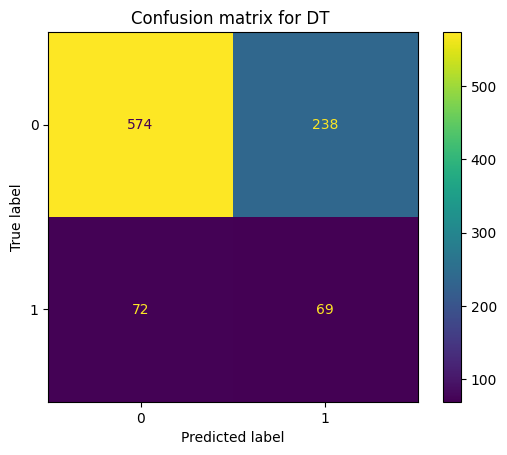

--------------------------------------------------------------------------------


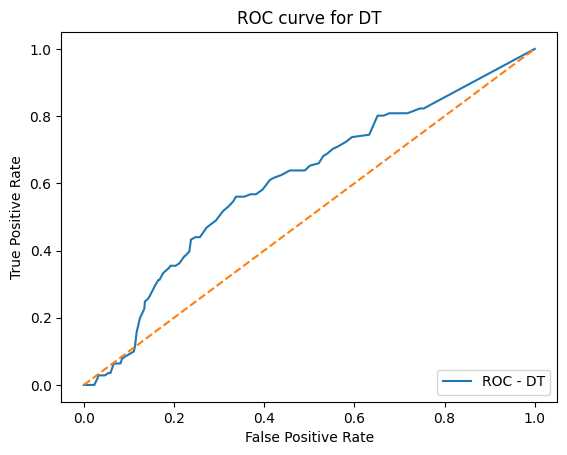

In [ ]:
predict(dt_optimal_model,'DT')

train accuracy :0.846
test accuracy :0.622
train precision : 0.775
test precision : 0.188
train recall : 0.976
test recall : 0.468
train f2 : 0.928
test f2 : 0.361
train roc_auc : 0.957
test roc_auc : 0.582
--------------------------------------------------------------------------------
classification report for KNN 
              precision    recall  f1-score   support

           0       0.88      0.65      0.75       812
           1       0.19      0.47      0.27       141

    accuracy                           0.62       953
   macro avg       0.53      0.56      0.51       953
weighted avg       0.77      0.62      0.67       953

--------------------------------------------------------------------------------


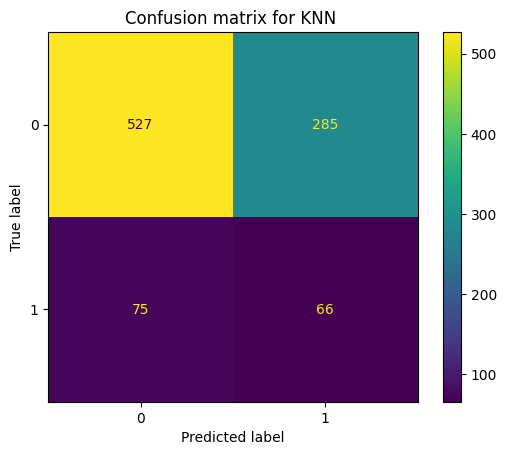

--------------------------------------------------------------------------------


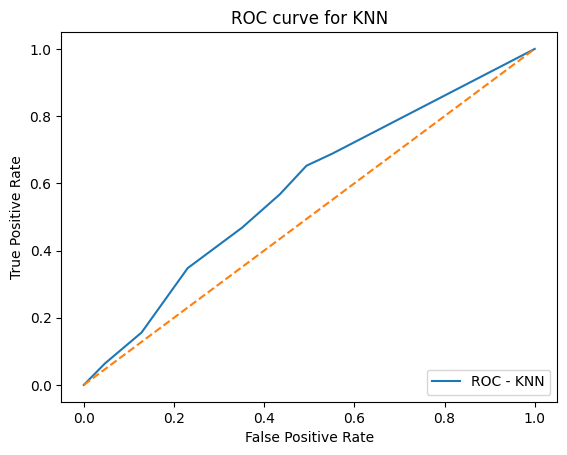

In [ ]:
predict(KNeighborsClassifier(n_neighbors=7), 'KNN')

train accuracy :0.57
test accuracy :0.822
train precision : 0.718
test precision : 0.374
train recall : 0.231
test recall : 0.305
train f2 : 0.267
test f2 : 0.317
train roc_auc : 0.714
test roc_auc : 0.724
--------------------------------------------------------------------------------
classification report for Naive Bayes 
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       812
           1       0.37      0.30      0.34       141

    accuracy                           0.82       953
   macro avg       0.63      0.61      0.62       953
weighted avg       0.81      0.82      0.81       953

--------------------------------------------------------------------------------


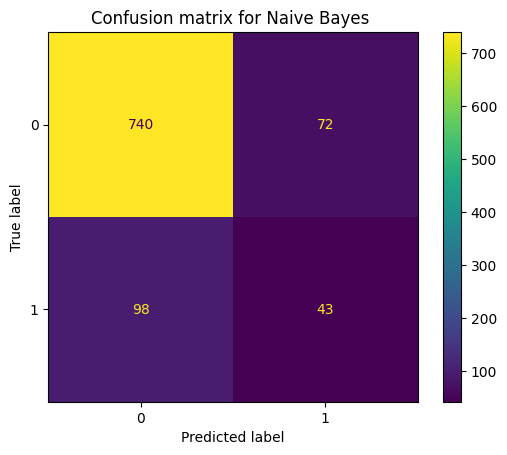

--------------------------------------------------------------------------------


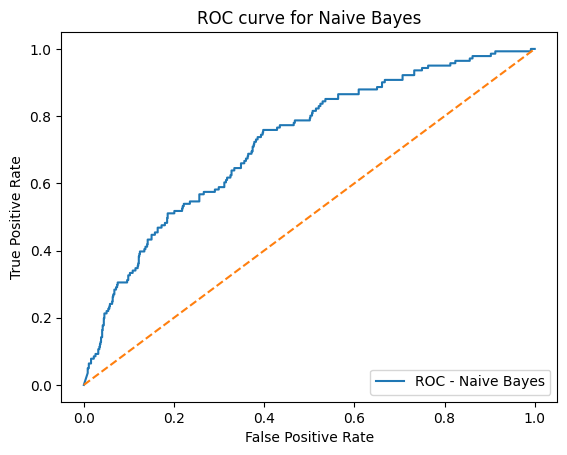

In [ ]:
predict(GaussianNB(),'Naive Bayes')

# **Model Selection & Evaluation Metric**

### Explain the ML Model used and it's performance using Evaluation metric Score Chart.1.

In [ ]:
model_result = pd.DataFrame(model_result)
round(model_result,3)
model_result[['model','test_recall','test_f2']]

,model,test_recall,test_f2
0,LogisticRegression,0.624113,0.481400
1,SVM,0.503546,0.428744
2,DT,0.489362,0.396096
3,KNN,0.468085,0.360656
4,Naive Bayes,0.304965,0.316642


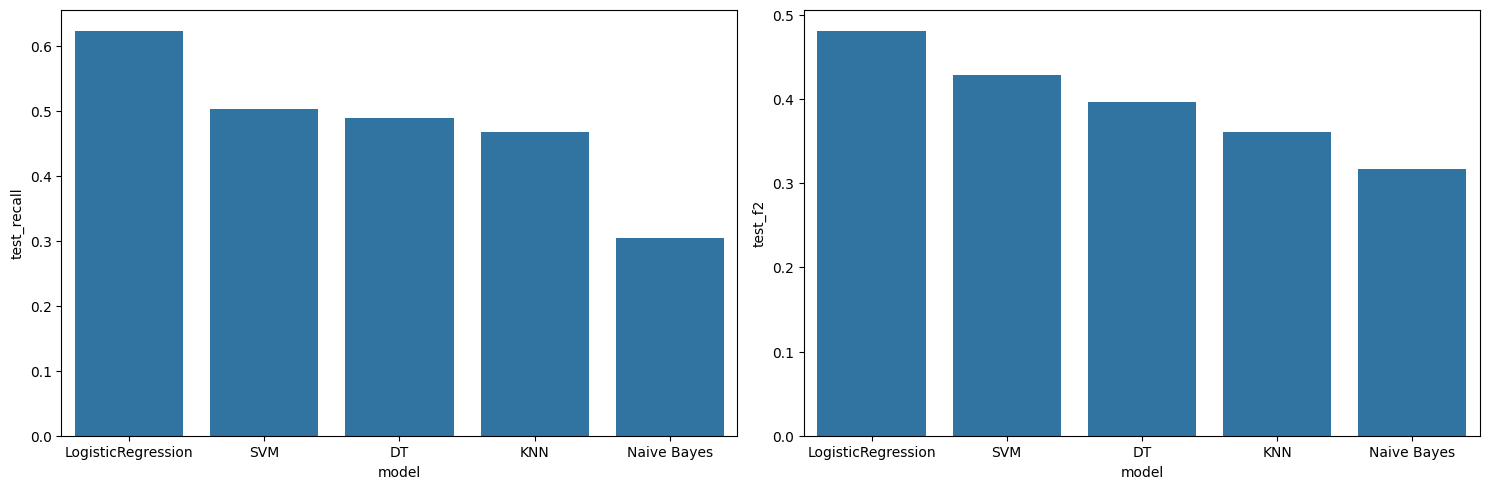

In [ ]:
# plotting graph to compare model performance of all the models
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x=model_result['model'], y=model_result['test_recall'],ax=axes[0])
sns.barplot(x=model_result['model'], y=model_result['test_f2'], ax=axes[1])
plt.tight_layout()

# Which Evaluation metrics did you consider

**Aim of the model**

Minimize False Positives:Actually having risk but predicted 0

Minimize False Neg :Actually not having but predicted 1

Maximize TP :Actuallly having it & predicted 1

Therefore, we use recall & f2 score as evaluation metric.

Recall=TP/(TP+FN) F2 score as it gives more weightage to recall over precision

## Which ML model did you choose from the above created models as your final prediction model and why?

Logistic Regression model was chosen finally as it has the recall of 65% and F2 score of 50%